In [1]:
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from collections import Counter
import os
import imageio
import glob

In [2]:
def plot_dataset(d):
    for clas, data in d.items():
        fig, ax = plt.subplots(1,10)
        fig.suptitle(f'{clas} - {data.shape}')
        plt.gcf().set_size_inches(20, 2)
        imgs = d[clas][np.random.choice(len(d[clas]), 10)]
        for i in range(10):
            ax[i].imshow(imgs[i], cmap='gray')
            ax[i].set_xticks([])
            ax[i].set_yticks([])
        plt.show()

# CIFAR10

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./dataset', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./dataset', train=False,
                                       download=True, transform=transform)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
idx_to_class = {v:k for k,v in trainset.class_to_idx.items()}
cifar_train = {}
for idx, clas in idx_to_class.items():
    idxs = np.where(np.array(trainset.targets) == idx)[0]
    if clas == 'automobile':
        cifar_train['car'] = trainset.data[idxs]
    elif clas == 'deer':
        continue
    else:
        cifar_train[clas] = trainset.data[idxs]

In [5]:
print("Image shape:", cifar_train['airplane'].shape[1:])
print("No. classes:", len(cifar_train.keys()))
print("Classes:", ', '.join(cifar_train.keys()))
print("Count per class:")
size = 0
for category, data in cifar_train.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (32, 32, 3)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
   airplane - 5000
   car - 5000
   bird - 5000
   cat - 5000
   dog - 5000
   frog - 5000
   horse - 5000
   ship - 5000
   truck - 5000
Dataset size: 45000


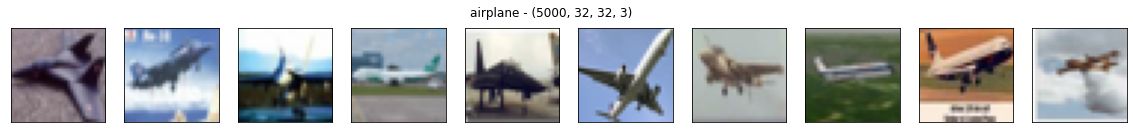

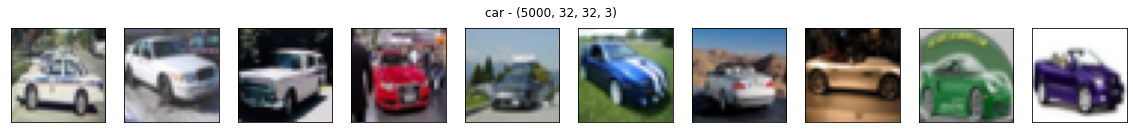

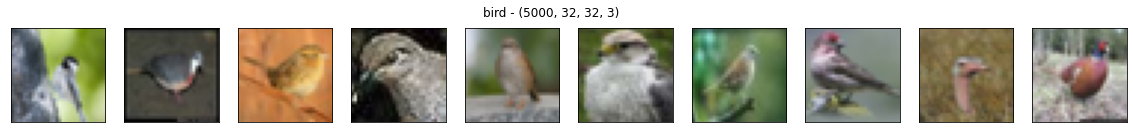

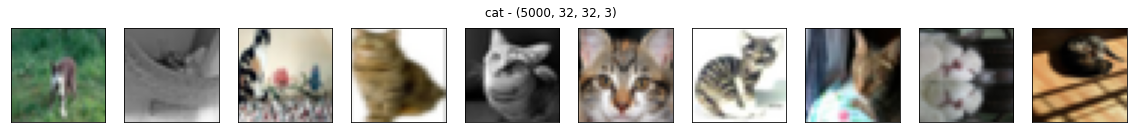

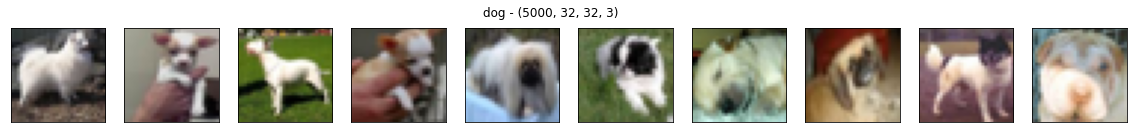

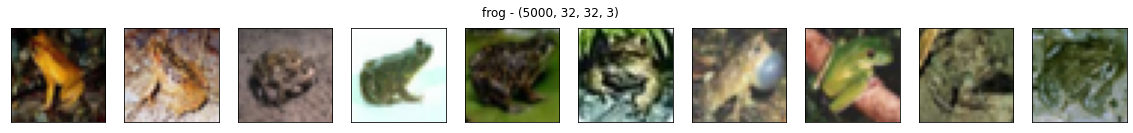

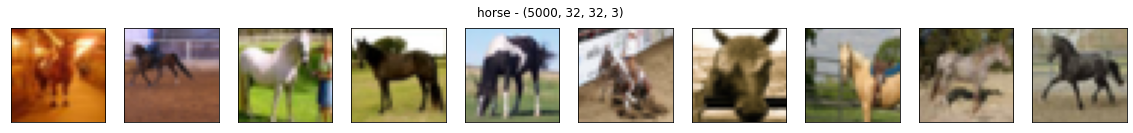

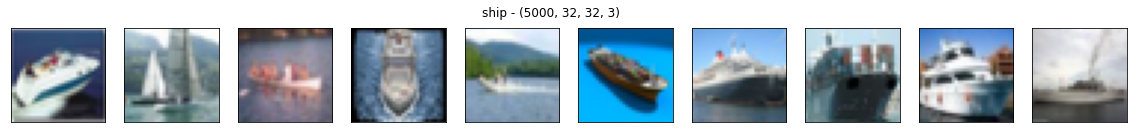

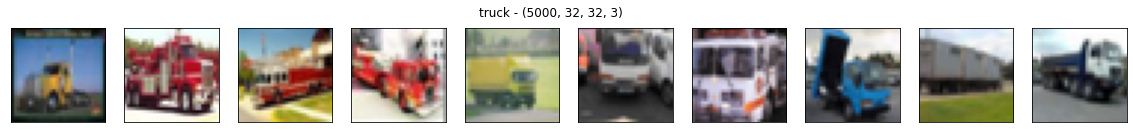

In [6]:
plot_dataset(cifar_train)

In [7]:
idx_to_class = {v:k for k,v in testset.class_to_idx.items()}
cifar_test = {}
for idx, clas in idx_to_class.items():
    idxs = np.where(np.array(testset.targets) == idx)[0]
    if clas == 'automobile':
        cifar_test['car'] = trainset.data[idxs]
    elif clas == 'deer':
        continue
    else:
        cifar_test[clas] = testset.data[idxs]

In [8]:
print("Image shape:", cifar_test['airplane'].shape[1:])
print("No. classes:", len(cifar_test.keys()))
print("Classes:", ', '.join(cifar_test.keys()))
print("Count per class:")
size = 0
for category, data in cifar_test.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (32, 32, 3)
No. classes: 9
Classes: airplane, car, bird, cat, dog, frog, horse, ship, truck
Count per class:
   airplane - 1000
   car - 1000
   bird - 1000
   cat - 1000
   dog - 1000
   frog - 1000
   horse - 1000
   ship - 1000
   truck - 1000
Dataset size: 9000


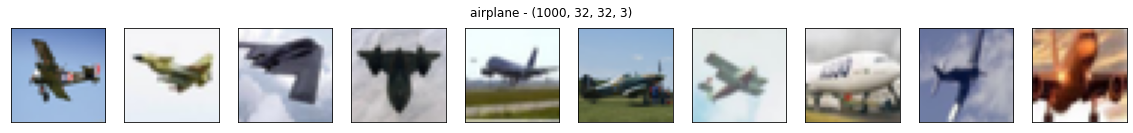

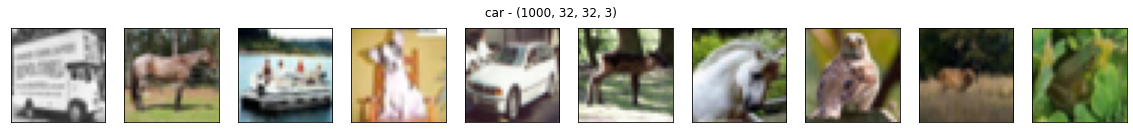

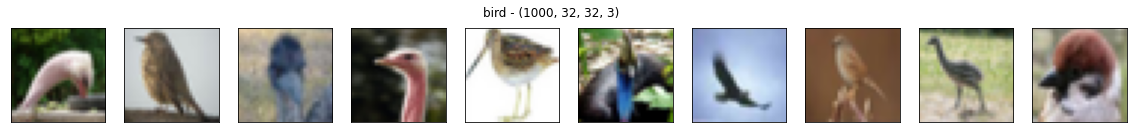

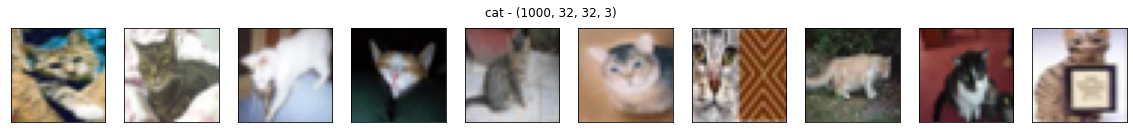

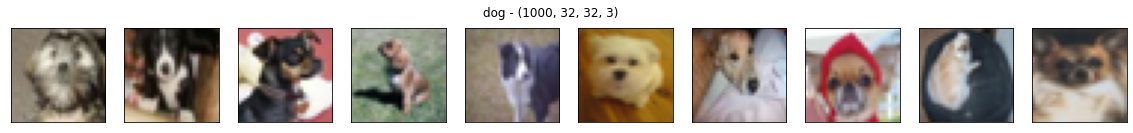

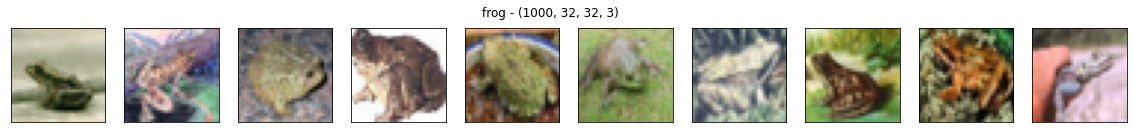

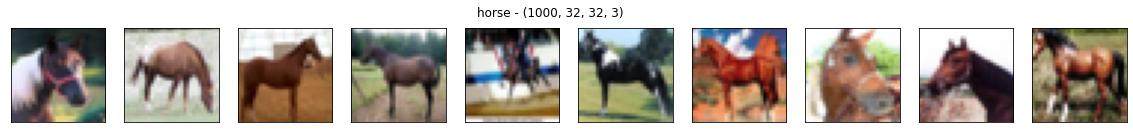

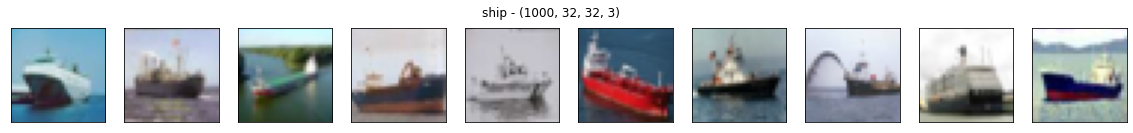

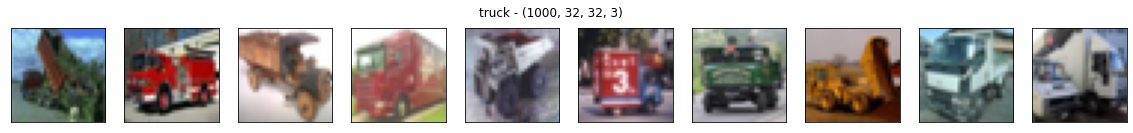

In [9]:
plot_dataset(cifar_test)

# QuickDraw

In [10]:
categories = ['airplane', 'bird', 'car', 'cat', 'cruise ship', 'dog', 'frog', 'horse', 'truck']
quickdraw = {}
for c in categories:
    if c == 'cruise ship':
        quickdraw['ship'] = 255 - np.load(f'dataset/quickdraw/{c}.npy').reshape((-1, 28, 28))
    else:
        quickdraw[c] = 255 - np.load(f'dataset/quickdraw/{c}.npy').reshape((-1, 28, 28))

In [11]:
print("Image shape:", quickdraw['airplane'].shape[1:])
print("No. classes:", len(quickdraw.keys()))
print("Classes:", ', '.join(quickdraw.keys()))
print("Count per class:")
size = 0
for category, data in quickdraw.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (28, 28)
No. classes: 9
Classes: airplane, bird, car, cat, ship, dog, frog, horse, truck
Count per class:
   airplane - 151623
   bird - 133572
   car - 182764
   cat - 123202
   ship - 123410
   dog - 152159
   frog - 159047
   horse - 178286
   truck - 131354
Dataset size: 1335417


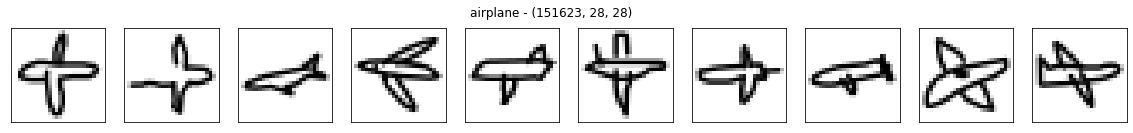

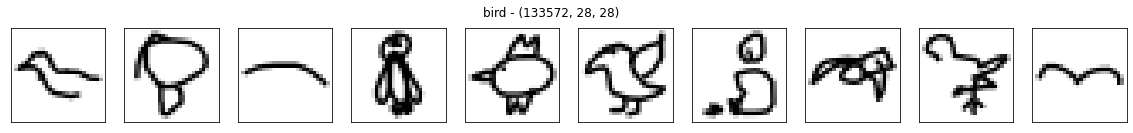

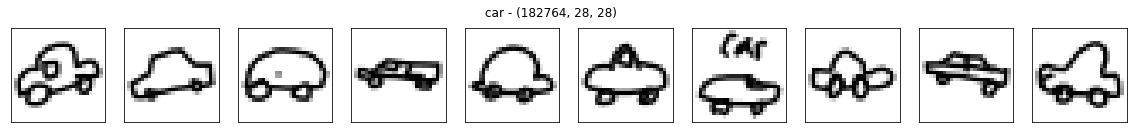

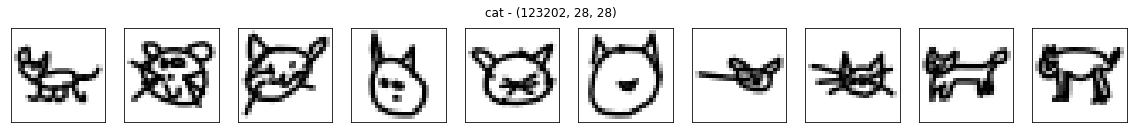

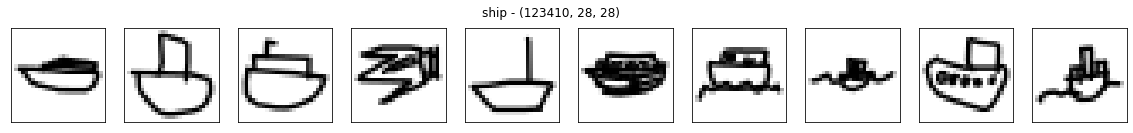

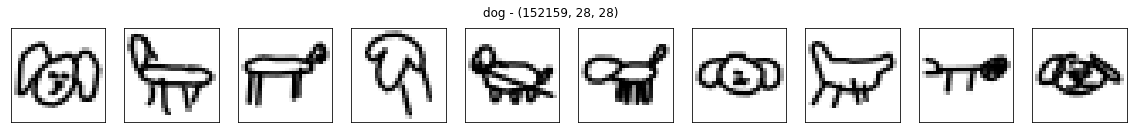

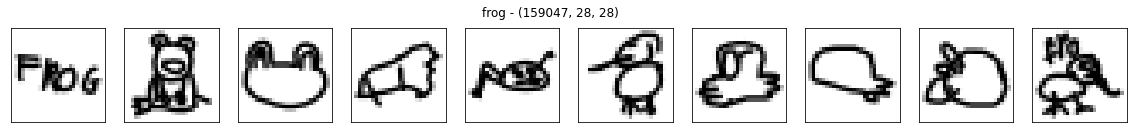

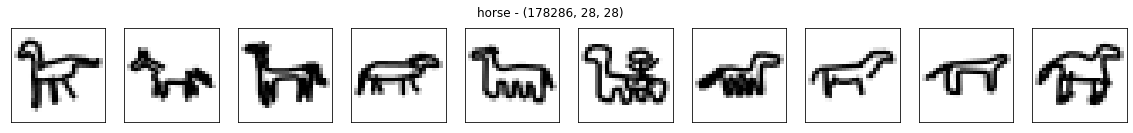

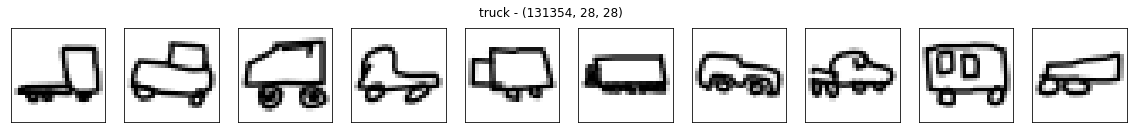

In [12]:
plot_dataset(quickdraw)

# Sketchy

In [13]:
sketchy_categories = ['airplane', 'car (sedan)', 'cat', 'dog', 'flying bird', 'frog', 'horse', 'pickup truck', 'race car', 'standing bird', 'truck']

In [14]:
sketchy = {}
for c in sketchy_categories:
    imgs = []
    for f in glob.glob(f"dataset/sketchy/{c}/*.png"):
        imgs.append(imageio.imread(f))
    if c == 'car (sedan)':
        sketchy['car'] = np.asarray(imgs)
    elif c == 'race car':
        np.append(sketchy['car'], np.asarray(imgs))
    elif c == 'flying bird':
        sketchy['bird'] = np.asarray(imgs)
    elif c == 'standing bird':
        np.append(sketchy['bird'], np.asarray(imgs))
    elif c == 'pickup truck':
        sketchy['truck'] = np.asarray(imgs)
    elif c == 'truck':
        sketchy['truck'] = np.asarray(imgs)
        np.append(sketchy['truck'], np.asarray(imgs))
    else:
        sketchy[c] = np.asarray(imgs)

In [15]:
print("Image shape:", sketchy['airplane'].shape[1:])
print("No. classes:", len(sketchy.keys()))
print("Classes:", ', '.join(sketchy.keys()))
print("Count per class:")
size = 0
for category, data in sketchy.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (1111, 1111)
No. classes: 8
Classes: airplane, car, cat, dog, bird, frog, horse, truck
Count per class:
   airplane - 80
   car - 80
   cat - 80
   dog - 80
   bird - 80
   frog - 80
   horse - 80
   truck - 80
Dataset size: 640


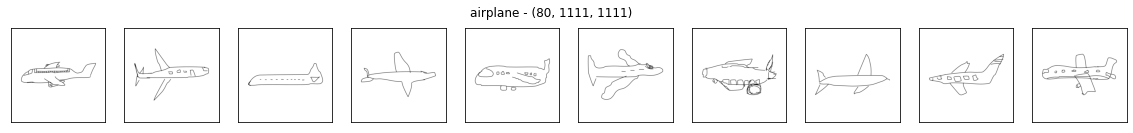

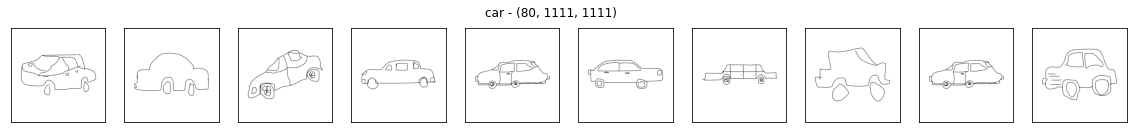

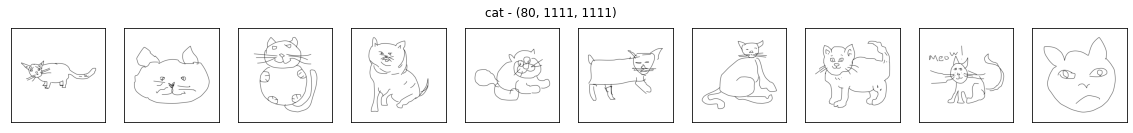

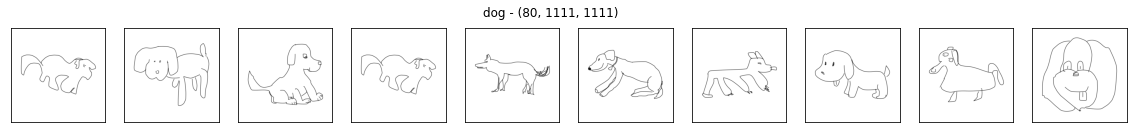

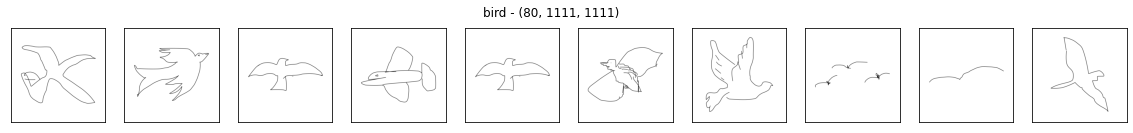

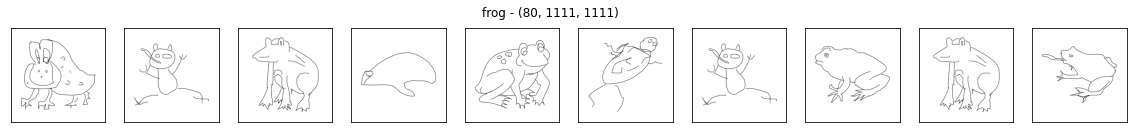

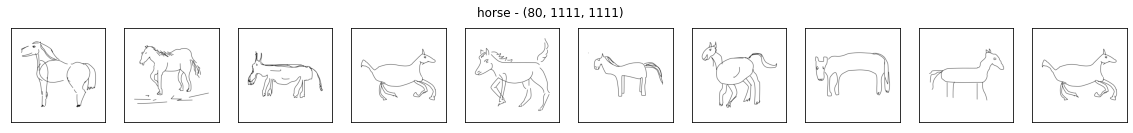

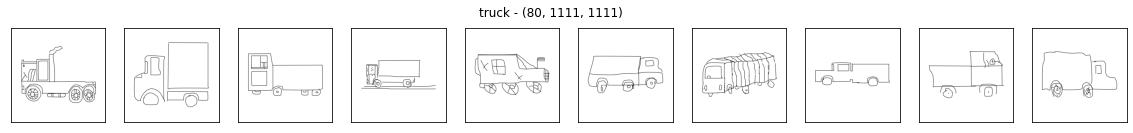

In [16]:
plot_dataset(sketchy)

# TUBerlin - Real

In [17]:
tuberlin_categories = ['airplane', 'car_(sedan)', 'cat', 'dog', 'frog', 'horse', 'pickup_truck', 'songbird', 'wading_bird']

In [18]:
tuberlin_real = {}
for c in tuberlin_categories:
    imgs = []
    for f in glob.glob(f"dataset/tuberlin/photo/tx_000100000000/{c}/*.jpg"):
        imgs.append(imageio.imread(f))
    if c == 'car_(sedan)':
        tuberlin_real['car'] = np.asarray(imgs)
    elif c == 'pickup_truck':
        tuberlin_real['truck'] = np.asarray(imgs)
    elif c == 'songbird':
        tuberlin_real['bird'] = np.asarray(imgs)
    elif c == 'wading_bird':
        np.append(sketchy['bird'], np.asarray(imgs))
    else:
        tuberlin_real[c] = np.asarray(imgs)

In [19]:
print("Image shape:", tuberlin_real['airplane'].shape[1:])
print("No. classes:", len(tuberlin_real.keys()))
print("Classes:", ', '.join(tuberlin_real.keys()))
print("Count per class:")
size = 0
for category, data in tuberlin_real.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (256, 256, 3)
No. classes: 8
Classes: airplane, car, cat, dog, frog, horse, truck, bird
Count per class:
   airplane - 100
   car - 100
   cat - 100
   dog - 100
   frog - 100
   horse - 100
   truck - 100
   bird - 100
Dataset size: 800


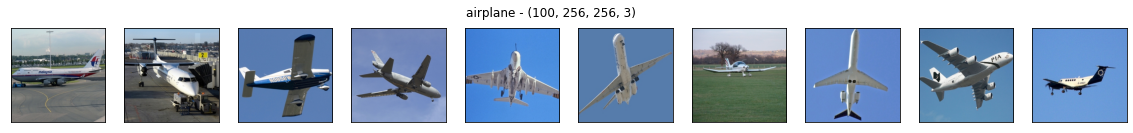

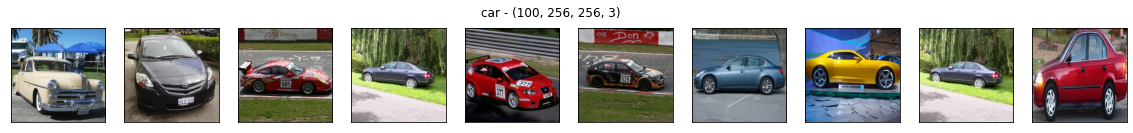

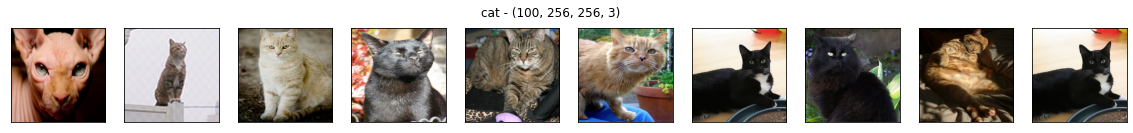

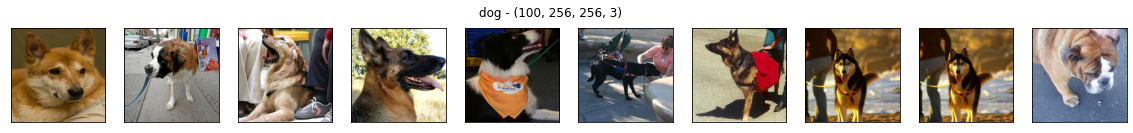

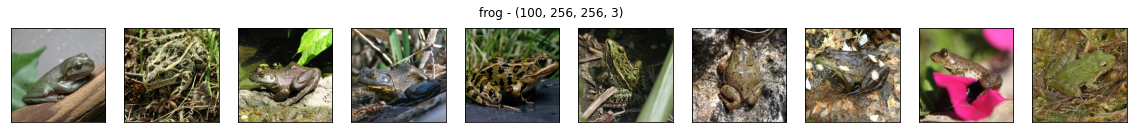

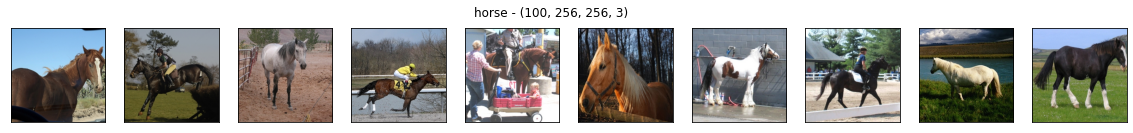

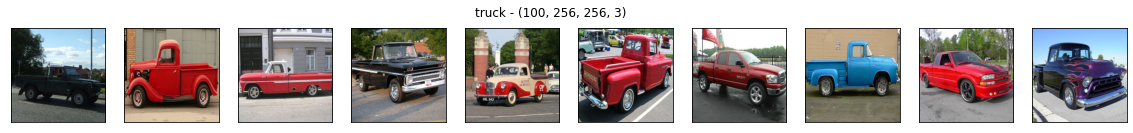

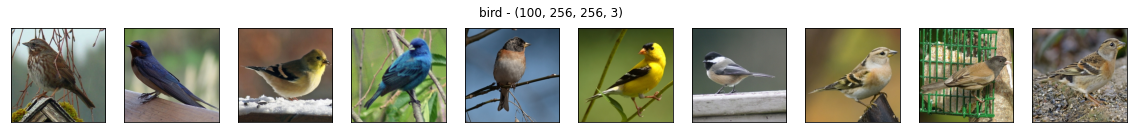

In [20]:
plot_dataset(tuberlin_real)

In [21]:
tuberlin_doodle = {}
for c in tuberlin_categories:
    imgs = []
    for f in glob.glob(f"dataset/tuberlin/sketch/tx_000000000000/{c}/*.png"):
        imgs.append(imageio.imread(f))
    if c == 'car_(sedan)':
        tuberlin_doodle['car'] = np.asarray(imgs)[:,:,:,0]
    elif c == 'pickup_truck':
        tuberlin_doodle['truck'] = np.asarray(imgs)[:,:,:,0]
    elif c == 'songbird':
        tuberlin_doodle['bird'] = np.asarray(imgs)[:,:,:,0]
    elif c == 'wading_bird':
        np.append(sketchy['bird'], np.asarray(imgs)[:,:,:,0])
    else:
        tuberlin_doodle[c] = np.asarray(imgs)[:,:,:,0]

In [22]:
print("Image shape:", tuberlin_doodle['airplane'].shape[1:])
print("No. classes:", len(tuberlin_doodle.keys()))
print("Classes:", ', '.join(tuberlin_doodle.keys()))
print("Count per class:")
size = 0
for category, data in tuberlin_doodle.items():
    print(f"   {category} - {data.shape[0]}")
    size += data.shape[0]
print("Dataset size:", size)

Image shape: (256, 256)
No. classes: 8
Classes: airplane, car, cat, dog, frog, horse, truck, bird
Count per class:
   airplane - 709
   car - 642
   cat - 692
   dog - 692
   frog - 608
   horse - 738
   truck - 698
   bird - 529
Dataset size: 5308


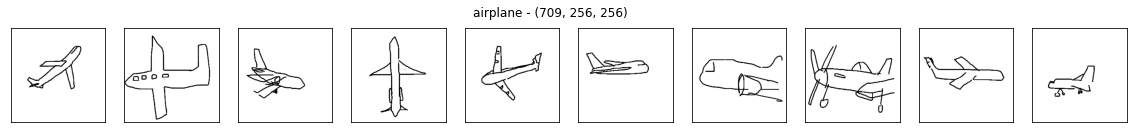

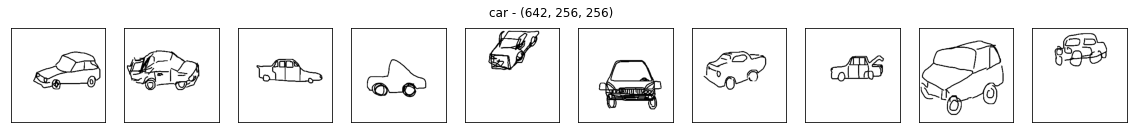

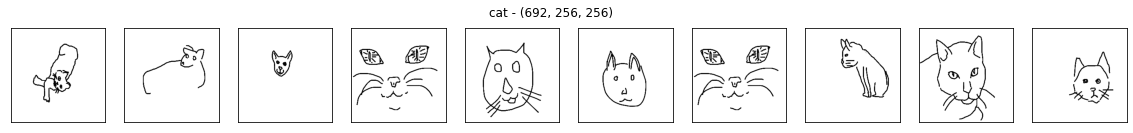

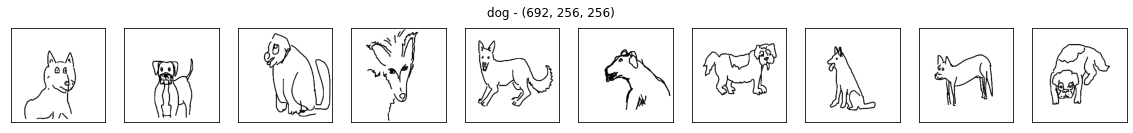

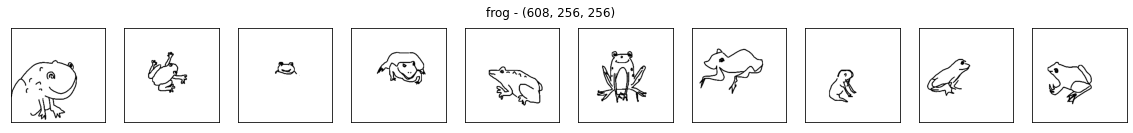

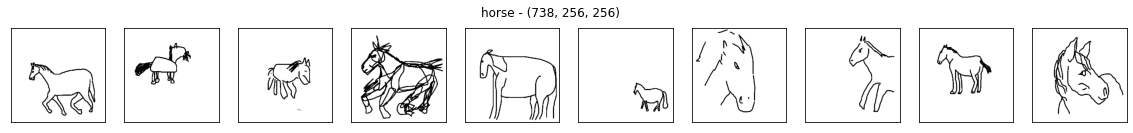

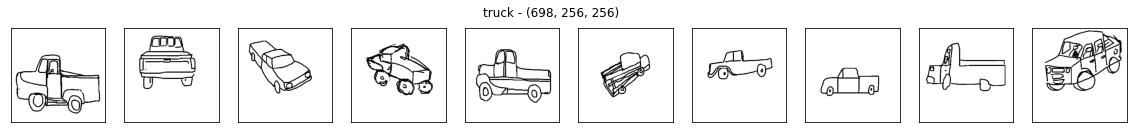

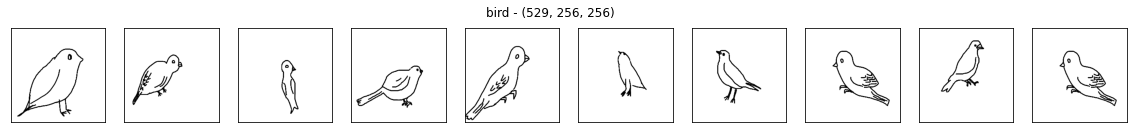

In [23]:
plot_dataset(tuberlin_doodle)

# Save/load datasets

In [30]:
dataset = {
    'cifar_train': cifar_train,
    'cifar_test': cifar_test,
    'quickdraw': quickdraw,
    'sketchy': sketchy,
    'tuberlin_real': tuberlin_real,
    'tuberlin_doodle': tuberlin_doodle
}
np.save("dataset/dataset.npy", dataset)

In [41]:
dataset = np.load('dataset/dataset.npy', allow_pickle=True)[()]
dataset.keys()

dict_keys(['cifar_train', 'cifar_test', 'quickdraw', 'sketchy', 'tuberlin_real', 'tuberlin_doodle'])